Paolo Perrotta, Programming Machine Learning: From Coding to Deep Learning (2020)

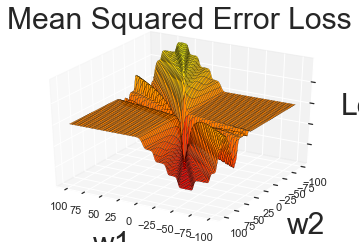

Press <Enter>...


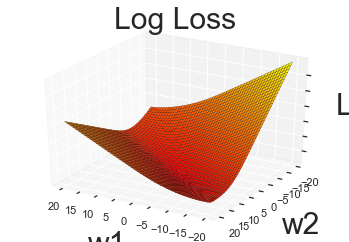

Enter to exit...


''

In [2]:
# %load plot_losses
# Plot a datasets' losses calculated with the MSE and log loss formulae.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

def mse_loss(X, Y, w):
    return np.average((forward(X, w) - Y) ** 2)

def log_loss(X, Y, w):
    y_hat = sigmoid(np.matmul(X, w))
    first_term = Y * np.log(y_hat)
    second_term = (1 - Y) * np.log(1 - y_hat)
    return -np.average(first_term + second_term)

def prepare_axes():
    ax = plt.figure().gca(projection="3d")
    ax.clear()
    ax.set_zticklabels(())
    ax.set_xlabel("w1", labelpad=15, fontsize=30)
    ax.set_ylabel("w2", labelpad=15, fontsize=30)
    ax.set_zlabel("Loss", labelpad=15, fontsize=30)
    ax.view_init(30, 120)
    return ax


# Come up with some plausible data
n_examples = 20
np.random.seed(1234)
X = np.random.rand(n_examples, 2)
w = [1.23, 2.34]
Y = np.dot(X, w)
Y_binary = np.greater_equal(Y, np.median(Y)).astype(int)

# Prepare plot
MESH_SIZE = 400
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})

# Plot mean squared error loss
ax = prepare_axes()
plt.title("Mean Squared Error Loss", fontsize=30)
view_range = 100    # Wide range to see the creeks and valleys
W1, W2 = np.meshgrid(np.linspace(-view_range, view_range, MESH_SIZE),
                     np.linspace(-view_range, view_range, MESH_SIZE))
losses = np.array([mse_loss(X, Y_binary, [w1, w2]) for w1, w2
                   in zip(np.ravel(W1), np.ravel(W2))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))
ax.plot_surface(W1, W2, L, cmap=cm.autumn, edgecolors='black',
                vmax=np.max(L), linewidth=0.2, antialiased=True)
plt.ion()
plt.show()
input("Press <Enter>...")

# Plot logarithmic loss
ax = prepare_axes()
plt.title("Log Loss", fontsize=30)
view_range = 20    # Tight range to avoid overflows
W1, W2 = np.meshgrid(np.linspace(-view_range, view_range, MESH_SIZE),
                     np.linspace(-view_range, view_range, MESH_SIZE))
losses = np.array([log_loss(X, Y_binary, [w1, w2]) for w1, w2 in
                   zip(np.ravel(W1), np.ravel(W2))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))
ax.plot_surface(W1, W2, L, cmap=cm.autumn, edgecolors='black',
                vmax=np.max(L), linewidth=0.2, antialiased=True)
plt.show()
input("Enter to exit...")
